In [1]:
from mapf import *
from rcbs import *
from matplotlib import pyplot as plt
import numpy as np

(16, 16)
16.0


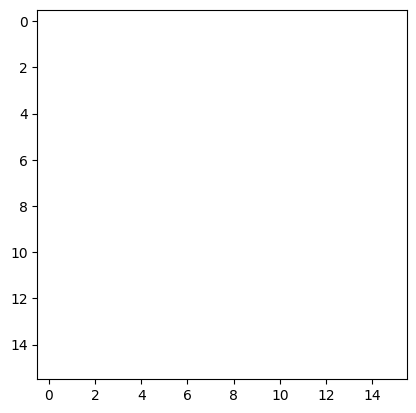

In [2]:
nrows = 2
ncols = 2
env = ColumnLatticeEnvironment(nrows, ncols, 0, 0, 4, 4, 1, 1)
size = env.gridworld.size
print(size)
print(np.sqrt(size[0]*size[1]-len(env.gridworld.obstacles)))
fig, ax = plt.subplots()
draw_environment(ax,env,{},{})

In [3]:
# N_agents = int(2*np.sqrt(size[0]*size[1]-len(env.gridworld.obstacles)))
N_agents = 30
print(N_agents)
x, final_goals, region_paths = random_problem(N_agents, env, path_cutoff = (nrows+ncols))

30


In [4]:
omega = 1
root = init_rcbs(env, x, final_goals, region_paths)
M = regional_cbs(root, env, omega, verbose = True, maxtime = 30.)
solution = M.make_solution()

# goals = {id: LocationGoal(final_goals[id]) for id in x}
# root = CBSNode(x, goals)
# action_gen = GridWorldActionGenerator(env.gridworld)
# M, lb = conflict_based_search(root, action_gen.actions, 1.1, verbose=True, maxtime=120)
# solution = MAPFSolution(M.paths)

Branching at region (1, 1) with constraint t = 3, p1 = (11, 9), p2 = (11, 8) applied to agent 24
Branching at region (1, 0) with constraint t = 3, p1 = (11, 7), p2 = (11, 8) applied to agent 22
Branching at region (1, 1) with constraint t = 3, p1 = (11, 9), p2 = (11, 8) applied to agent 24
Branching at region (1, 0) with constraint t = 3, p1 = (11, 7), p2 = (11, 8) applied to agent 22
# of completed trips 0
advancing agents...
OH SHIT


TypeError: 'NoneType' object is not subscriptable

In [66]:

def verify_solution(solution: MAPFSolution) -> bool:

    if solution is None:
        return False
    
    paths = solution.paths
    agents = list(paths.keys())
    violations = [] 
    for i in range(len(agents)):
        for j in range(i + 1, len(agents)):
            path1 = paths[agents[i]].vertexes
            path2 = paths[agents[j]].vertexes
            
           
            for t in range(min(len(path1), len(path2))):
             
                if path1[t].pos == path2[t].pos:
                    if t < min(len(path1)-1,len(path2)-1):
                        print(f"Vertex collision between agents {agents[i]} and {agents[j]}")
                        print(f"Time: {t}")
                        print(f"Position: {path1[t].pos}")
                        violations.append({'type':'vertex','agents':(agents[i],agents[j]),'pos': path1[t].pos, 'time': t})
                
                if t < min(len(path1)-1, len(path2)-1):
                    if (path1[t].pos == path2[t+1].pos and 
                        path1[t+1].pos == path2[t].pos):
                        print(f"Edge collision between agents {agents[i]} and {agents[j]}")
                        print(f"Time: {t}-{t+1}")
                        violations.append({'type':'edge','agents':(agents[i],agents[j]),'edge': (path1[t].pos,path2[t].pos), 'time': t})
    
    return violations

if solution:
        print("\nVerifying RCBS solution...")
        violations = verify_solution(solution)
        if len(violations) > 0:
            print(len(violations))
            print(violations)

for id, path in solution.paths.items():
    print({id:str(path)})
# MAPFAnimation(env, solution).animate().save('foo.gif')


Verifying RCBS solution...
Vertex collision between agents 3 and 10
Time: 7
Position: (12, 7)
1
[{'type': 'vertex', 'agents': (3, 10), 'pos': (12, 7), 'time': 7}]
{0: '(t = 0, p = (10, 14)), (t = 1, p = (9, 14)), (t = 2, p = (8, 14)), (t = 3, p = (8, 15)), (t = 4, p = (7, 15)), (t = 5, p = (6, 15)), (t = 6, p = (5, 15))'}
{1: '(t = 0, p = (11, 6)), (t = 1, p = (11, 7)), (t = 2, p = (11, 8)), (t = 3, p = (10, 8)), (t = 4, p = (10, 9)), (t = 5, p = (10, 10)), (t = 6, p = (10, 11)), (t = 7, p = (10, 12))'}
{2: '(t = 0, p = (4, 14)), (t = 1, p = (5, 14)), (t = 2, p = (6, 14)), (t = 3, p = (7, 14)), (t = 4, p = (8, 14)), (t = 5, p = (8, 13)), (t = 6, p = (8, 12)), (t = 7, p = (8, 11)), (t = 8, p = (9, 11)), (t = 9, p = (9, 10)), (t = 10, p = (10, 10)), (t = 11, p = (11, 10)), (t = 12, p = (12, 10)), (t = 13, p = (13, 10)), (t = 14, p = (13, 9)), (t = 15, p = (14, 9)), (t = 16, p = (15, 9))'}
{3: '(t = 0, p = (12, 14)), (t = 1, p = (12, 13)), (t = 2, p = (12, 12)), (t = 3, p = (12, 11)), (t

In [67]:
agenti, agentj = 3,10
t = 7
print(solution.paths[agenti])
print(solution.paths[agentj])
print(region_paths[agenti])
print(region_paths[agentj])
print(len(solution.paths[agenti]))
print(len(solution.paths[agentj]))

(t = 0, p = (12, 14)), (t = 1, p = (12, 13)), (t = 2, p = (12, 12)), (t = 3, p = (12, 11)), (t = 4, p = (12, 10)), (t = 5, p = (12, 9)), (t = 6, p = (12, 8)), (t = 7, p = (12, 7)), (t = 8, p = (11, 7)), (t = 9, p = (10, 7)), (t = 10, p = (9, 7)), (t = 11, p = (8, 7)), (t = 12, p = (7, 7)), (t = 13, p = (7, 6)), (t = 14, p = (6, 6)), (t = 15, p = (5, 6)), (t = 16, p = (4, 6)), (t = 17, p = (4, 5)), (t = 18, p = (3, 5))
(t = 0, p = (13, 13)), (t = 1, p = (13, 12)), (t = 2, p = (13, 11)), (t = 3, p = (13, 10)), (t = 4, p = (13, 9)), (t = 5, p = (13, 8)), (t = 6, p = (13, 7)), (t = 7, p = (12, 7)), (t = 8, p = (12, 6))
[(1, 1), (1, 0), (0, 0)]
[(1, 1), (1, 0)]
19
9


In [ ]:
R = env.region_graph.nodes[(0,1)]
R['env'].boundary
R['env'].contains_node((0,4))

In [ ]:
goals = {id: LocationGoal(final_goals[id]) for id in x}
root = CBSNode(x, goals)
action_gen = GridWorldActionGenerator(env.gridworld)
N, lb = conflict_based_search(root, action_gen.actions, 1.1, verbose=True, maxtime=120)

In [ ]:
print(M.cost)
print(N.cost)
print((M.cost-N.cost)/N.cost)

In [ ]:
solution = M.make_solution()
MAPFAnimation(env, solution).animate().save('foo.gif')